In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, pearsonr

# Multivariate Data with the Anscombe Dataset

In [2]:
df = pd.read_csv("~/Downloads/anscombe.csv", index_col=0)

Here we use some common values to describe a dataset:
- number of points
- sample mean
- line of best fit
- residual of fit
- pearson r correlation

In [3]:
def get_plot(ax, x, y):
    fig, = ax.plot(x, y,'o',
                   label='N={}\n'.format(len(x))
                   +r'$\bar{x}$='
                   +'{:.1f}'.format( x.mean() )
                   +'\n'
                   +r'$\bar{y}$'
                   +'={:.1f}'.format( y.mean() ))

    m, c, _, _, res = linregress(x, y)
    cor,_ = pearsonr(x,y)
    ax.plot([x.min(),x.max()],[x.min()*m+c,x.max()*m+c],
         label='slope {:.1f}\nintercept {:.1f}'.format(m,c))

    ax.plot([],[],' ',label=
                    'residual std = {:.2f}\n'.format(res)
                    +'correlation = {:.2f}'.format(cor))
    ax.legend(fontsize=12)
    return fig

for the 4 different data sets $x$ and $y$ have very different distrubtions but the identical summary values

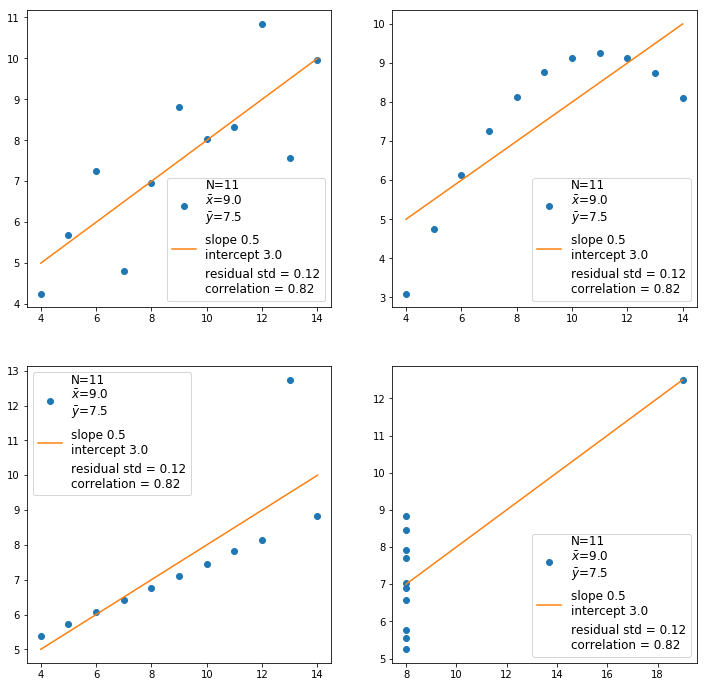

In [4]:
fig, ax_array = plt.subplots(2, 2, figsize=(12,12))
for i,ax in enumerate(np.ravel(ax_array)):
    get_plot(ax, df['x{}'.format(i+1)].values, df['y{}'.format(i+1)].values)
plt.show()